<a href="https://colab.research.google.com/github/ziedtuihri/Data_Science_Projects/blob/main/garment_productivit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Garment productivit

# Importing Libraries

In [91]:

#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing Seaborn for statistical data visualization, built on top of Matplotlib.

import warnings
from rich import print
#-------------------------------------------------------------------------------------------------------------------------------

In [92]:
import matplotlib_inline.backend_inline

# Plot settings
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

# Set max rows displayed for readability
#pd.set_option("display.max_rows", 6)

warnings.filterwarnings('ignore')

# Data Understanding




### Data Acquisition & Description

a. How was it collected?

This dataset includes important attributes of the garment manufacturing process, it it's sent by our professor in the university.

c. The datasets used for the analysis is

dataProductivity Prediction of Garment Employeese.csv in my github account exactly in the folder data.

<hr>

### Data Information
Importing Data Set

In [93]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/ziedtuihri/Data_Science_Projects/refs/heads/main/data/dataProductivity%20Prediction%20of%20Garment%20Employeese.csv",
    index_col=0,
)
df.head()


,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
1/1/2015,Quarter1,sweing,Thursday,8.0,0.80,26.16,1108.0,7080.0,98.0,0.0,NaN,0.0,59.0,0.940725
1/1/2015,Quarter1,finishing,Thursday,1.0,0.75,3.94,NaN,960.0,0.0,0.0,0.0,0.0,8.0,0.886500
1/1/2015,Quarter1,sweing,Thursday,11.0,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
1/1/2015,Quarter1,sweing,Thursday,12.0,0.80,11.41,NaN,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
1/1/2015,Quarter1,sweing,Thursday,6.0,NaN,25.90,1170.0,1920.0,50.0,0.0,0.0,0.0,56.0,0.800382


In [94]:
df.tail()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
3/3/2015,Quarter1,finishing,Tuesday,2.0,0.4,3.90,NaN,6300.0,0.0,0.0,0.0,0.0,15.0,0.567378
2/24/2015,Quarter4,finishing,Tuesday,9.0,0.7,2.90,NaN,1800.0,0.0,0.0,0.0,0.0,15.0,0.726933
2/14/2015,Quarter2,sweing,Saturday,11.0,0.6,11.41,1039.0,2280.0,23.0,0.0,0.0,NaN,55.0,0.600448
2/11/2015,Quarter2,finishing,Wednesday,12.0,0.8,4.08,NaN,1080.0,0.0,0.0,0.0,0.0,9.0,1.020000
2/25/2015,Quarter4,sweing,Wednesday,4.0,0.8,30.10,323.0,4080.0,50.0,0.0,0.0,1.0,59.0,0.800809


In [95]:
print('Data Shape:', df.shape)

Data Shape:
(1302, 14)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 1/1/2015 to 2/25/2015
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1279 non-null   object 
 1   department             1275 non-null   object 
 2   day                    1274 non-null   object 
 3   team                   1278 non-null   float64
 4   targeted_productivity  1279 non-null   float64
 5   smv                    1276 non-null   float64
 6   wip                    729 non-null    float64
 7   over_time              1276 non-null   float64
 8   incentive              1275 non-null   float64
 9   idle_time              1275 non-null   float64
 10  idle_men               1278 non-null   float64
 11  no_of_style_change     1279 non-null   float64
 12  no_of_workers          1280 non-null   float64
 13  actual_productivity    1267 non-null   float64
dtypes: float64(11), object(3)
memory usage: 152.6+ KB

In [97]:
#descriptive analytics
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1278.000000,1279.000000,1276.000000,729.000000,1276.000000,1275.000000,1275.000000,1278.000000,1279.000000,1280.000000,1267.000000
mean,6.443662,0.730274,15.061418,1148.422497,4551.332288,36.967843,0.688235,0.357590,0.146990,34.553906,0.734889
std,3.468331,0.096727,10.989957,1596.736245,3347.164546,155.419707,12.316019,3.191313,0.422717,22.256752,0.173802
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,762.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650173
50%,7.000000,0.750000,15.260000,1040.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.763375
75%,9.000000,0.800000,24.260000,1255.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850354
max,12.000000,0.800000,54.560000,21540.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [98]:
df.isnull().sum()  # Number of missing values per column


quarter                   23
department                27
day                       28
team                      24
targeted_productivity     23
smv                       26
wip                      573
over_time                 26
incentive                 27
idle_time                 27
idle_men                  24
no_of_style_change        23
no_of_workers             22
actual_productivity       35
dtype: int64

In [99]:
df['team'].unique()  # Lists unique values in a specific column


array([ 8.,  1., 11., 12.,  6.,  7.,  2.,  3.,  9., 10.,  5.,  4., nan])

In [100]:
#Exploratory Data Analysis (EDA)
#Correlation Between Numeric Features:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
corr_matrix = numeric_df.corr()
corr_matrix


,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.036349,-0.127970,-0.017096,-0.113132,-0.000355,0.003643,0.023530,-0.027856,-0.090022,-0.137331
targeted_productivity,0.036349,1.000000,-0.068560,0.054460,-0.093262,0.032950,-0.056043,-0.050182,-0.177373,-0.080115,0.424445
smv,-0.127970,-0.068560,1.000000,-0.050088,0.675092,0.041883,0.055472,0.103373,0.317794,0.910230,-0.128880
wip,-0.017096,0.054460,-0.050088,1.000000,0.027639,0.184365,-0.027829,-0.053121,-0.078752,0.020857,0.140742
over_time,-0.113132,-0.093262,0.675092,0.027639,1.000000,0.006137,0.023439,-0.028471,0.067561,0.731478,-0.066107
incentive,-0.000355,0.032950,0.041883,0.184365,0.006137,1.000000,-0.011573,-0.019452,-0.023851,0.053827,0.075421
idle_time,0.003643,-0.056043,0.055472,-0.027829,0.023439,-0.011573,1.000000,0.555410,-0.010921,0.051105,-0.079838
idle_men,0.023530,-0.050182,0.103373,-0.053121,-0.028471,-0.019452,0.555410,1.000000,0.131398,0.105145,-0.180354
no_of_style_change,-0.027856,-0.177373,0.317794,-0.078752,0.067561,-0.023851,-0.010921,0.131398,1.000000,0.329651,-0.199570
no_of_workers,-0.090022,-0.080115,0.910230,0.020857,0.731478,0.053827,0.051105,0.105145,0.329651,1.000000,-0.077006


In [101]:
#Correlation with Target Variable
corr_matrix_vs_target=numeric_df.corr()['actual_productivity'].sort_values(ascending=False)
corr_matrix_vs_target


actual_productivity      1.000000
targeted_productivity    0.424445
wip                      0.140742
incentive                0.075421
over_time               -0.066107
no_of_workers           -0.077006
idle_time               -0.079838
smv                     -0.128880
team                    -0.137331
idle_men                -0.180354
no_of_style_change      -0.199570
Name: actual_productivity, dtype: float64

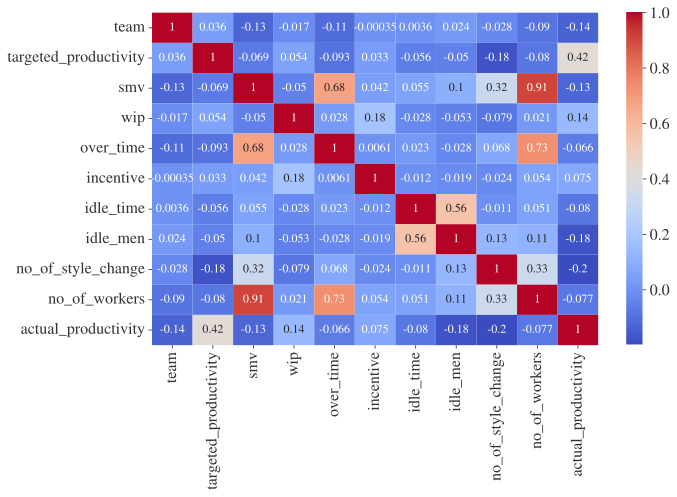

In [102]:
#Plot the Correlation Heatmap:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


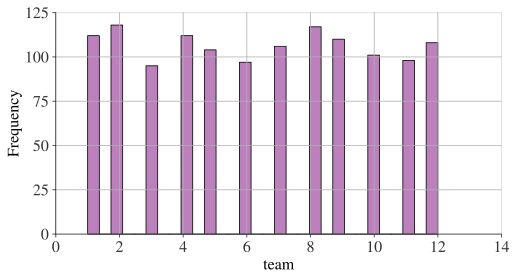

In [103]:
#Distribution of a Column:
df['team'].hist(bins=30)
plt.xlabel('team')
plt.ylabel('Frequency')
plt.show()


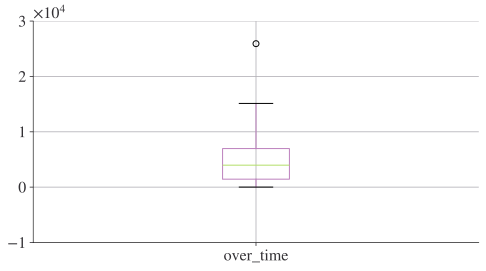

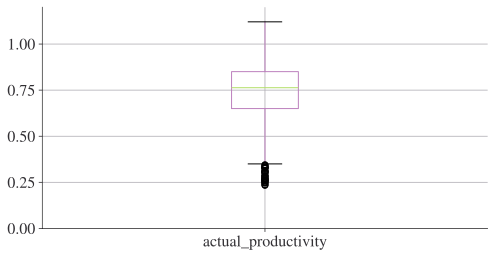

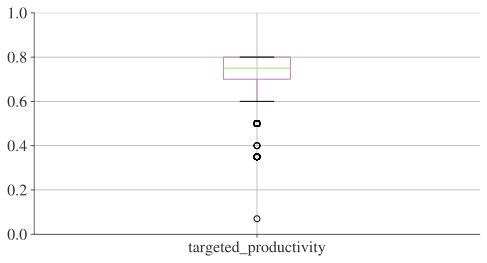

In [104]:
#Outliers Detection (Boxplot):
df.boxplot(column=['over_time'])
Bp1= plt.show()
Bp1
df.boxplot(column=['actual_productivity'])
Bp2=plt.show()
Bp2
df.boxplot(column=['targeted_productivity'])
Bp3=plt.show()
Bp3

In [105]:
#data Cleaning
#Step0: # Step 1: Clean Column Names
# Explanation: This step removes any leading or trailing whitespace in column names to avoid KeyErrors.
df.columns = df.columns.str.strip()

# Check column names to ensure 'date' is present and correctly formatted
print("Column names:", df.columns)

# Step 2: Fill Missing Values for Categorical Columns
# Explanation: For categorical columns like 'date', 'quarter', 'department', and 'day', we'll use the most frequent value (mode) to fill in missing values. 
# This ensures that missing data is replaced by the most representative category without adding unknown categories.

# For 'quarter' column, fill with mode
df['quarter'].fillna(df['quarter'].mode()[0], inplace=True)

# For 'department' column, fill with mode
df['department'].fillna(df['department'].mode()[0], inplace=True)

# For 'day' column, fill with mode
df['day'].fillna(df['day'].mode()[0], inplace=True)



Column names: Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [106]:
# Step 3: Fill Missing Values for Numeric Columns
# For numeric columns, we use the median to impute missing values.
numeric_columns = ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 
                   'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 
                   'no_of_workers', 'actual_productivity']

for col in numeric_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Step 4: Drop Rows with Missing 'date'
# Explanation: Drop rows with missing dates if they exist, as date is crucial for time-based analysis.
if 'date' in df.columns:
    df.dropna(subset=['date'], inplace=True)
else:
    print("Warning: 'date' column not found in the dataset.")

# Step 5: Verify Missing Values
# Confirm no missing values remain in the dataset.
missing_values_after = df.isnull().sum()
print("Missing values after cleaning:", missing_values_after)

Warning: 'date' column not found in the dataset.

Missing values after cleaning: quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [107]:
# Data Transformation
from sklearn.preprocessing import MinMaxScaler
import pandas as pd



# Step 1: Normalize Numerical Columns
# Selecting the numeric columns to scale
numeric_columns = ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 
                   'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 
                   'no_of_workers', 'actual_productivity']

# Initialize the MinMaxScaler and fit_transform it to numeric data
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Step 2: Encode Categorical Columns
# We will use One-Hot Encoding for 'quarter', 'department', and 'day'
categorical_columns = ['quarter', 'department', 'day']

# Check which categorical columns are present in the DataFrame
existing_categorical_columns = [col for col in categorical_columns if col in df.columns]

if existing_categorical_columns:
    df = pd.get_dummies(df, columns=existing_categorical_columns, drop_first=True)  # drop_first reduces multicollinearity
else:
    print("Warning: None of the specified categorical columns are present in the dataset.")

# Step 3: Extract Date Information
# Check if 'date' column exists before processing
if 'date' in df.columns:
    # Convert 'date' column to datetime format and handle errors if any
    df['date'] = pd.to_datetime(df['date'], errors='coerce')  
    
    # Extract day, month, year from the date
    df['day_of_month'] = df['date'].dt.day
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    
    # Drop the original 'date' column if extracted features are enough
    df.drop(columns=['date'], inplace=True)
else:
    print("Warning: 'date' column not found in the dataset. Skipping date extraction.")

# Final transformed dataset
print("Transformed Data Sample:")
print(df.head())


Warning: 'date' column not found in the dataset. Skipping date extraction.

Transformed Data Sample:

team  targeted_productivity       smv       wip  over_time  \
date                                                                       
1/1/2015  0.636364               1.000000  0.450252  0.051131   0.273148   
1/1/2015  0.000000               0.931507  0.020132  0.047973   0.037037   
1/1/2015  0.909091               1.000000  0.164731  0.044629   0.141204   
1/1/2015  1.000000               1.000000  0.164731  0.047973   0.141204   
1/1/2015  0.454545               0.931507  0.445219  0.054010   0.074074   

          incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
date                                                                          
1/1/2015   0.027222        0.0       0.0                 0.0       0.655172   
1/1/2015   0.000000        0.0       0.0                 0.0       0.068966   
1/1/2015   0.013889        0.0       0.0                 0.0       0.327586   
1/1/2015   0.013889        0.0       0.0                 0.0       0.327586   
1/1/2015   0.013889        0.0       0.0                 0.0       0.620690   

          ...  quarter_Quarter3  quarter_Quarter4  quarter_Quarter5  \
date      ...                                                         
1/1/2015  ...             False             False             False   
1/1/2015  ...             False             False             False   
1/1/2015  ...             False             False             False   
1/1/2015  ...             False             False             False   
1/1/2015  ...             False             False             False   

          department_finishing   department_sweing  day_Saturday  day_Sunday  \
date                                                                           
1/1/2015                  False               True         False       False   
1/1/2015                   True              False         False       False   
1/1/2015                  False               True         False       False   
1/1/2015                  False               True         False       False   
1/1/2015                  False               True         False       False   

          day_Thursday  day_Tuesday  day_Wednesday  
date                                                
1/1/2015          True        False          False  
1/1/2015          True        False          False  
1/1/2015          True        False          False  
1/1/2015          True        False          False  
1/1/2015          True        False          False  

[5 rows x 22 columns]

Transformed Data Sample:

team  targeted_productivity       smv       wip  over_time  \
date                                                                       
1/1/2015  0.636364               1.000000  0.450252  0.051131   0.273148   
1/1/2015  0.000000               0.931507  0.020132  0.047973   0.037037   
1/1/2015  0.909091               1.000000  0.164731  0.044629   0.141204   
1/1/2015  1.000000               1.000000  0.164731  0.047973   0.141204   
1/1/2015  0.454545               0.931507  0.445219  0.054010   0.074074   

          incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
date                                                                          
1/1/2015   0.027222        0.0       0.0                 0.0       0.655172   
1/1/2015   0.000000        0.0       0.0                 0.0       0.068966   
1/1/2015   0.013889        0.0       0.0                 0.0       0.327586   
1/1/2015   0.013889        0.0       0.0                 0.0       0.327586   
1/1/2015   0.013889        0.0       0.0                 0.0       0.620690   

          ...  quarter_Quarter3  quarter_Quarter4  quarter_Quarter5  \
date      ...                                                         
1/1/2015  ...             False             False             False   
1/1/2015  ...             False             False             False   
1/1/2015  ...             False             False             False   
1/1/2015  ...             False             False             False   
1/1/2015  ...             False             False             False   

          department_finishing   department_sweing  day_Saturday  day_Sunday  \
date                                                                           
1/1/2015                  False               True         False       False   
1/1/2015                   True              False         False       False   
1/1/2015                  False               True         False       False   
1/1/2015                  False               True         False       False   
1/1/2015                  False               True         False       False   

          day_Thursday  day_Tuesday  day_Wednesday  
date                                                
1/1/2015          True        False          False  
1/1/2015          True        False          False  
1/1/2015          True        False          False  
1/1/2015          True        False          False  
1/1/2015          True        False          False  

[5 rows x 22 columns]

Model Performance Metrics:

Model: Linear Regression

Mean Absolute Error (MAE): 0.1210

Mean Squared Error (MSE): 0.0288

R^2 Score: 0.1784

------------------------------

Model: Random Forest

Mean Absolute Error (MAE): 0.0791

Mean Squared Error (MSE): 0.0173

R^2 Score: 0.5063

------------------------------

Model: Support Vector Machine

Mean Absolute Error (MAE): 0.1180

Mean Squared Error (MSE): 0.0274

R^2 Score: 0.2181

------------------------------

Sample Predictions Comparison:

Actual  Linear Regression  Random Forest  Support Vector Machine
date                                                                         
1/28/2015  0.864438           0.673292       0.853661                0.746873
2/11/2015  0.526521           0.504881       0.519062                0.480385
1/18/2015  0.469745           0.535943       0.473246                0.568364
2/19/2015  0.563386           0.537353       0.646131                0.518261
1/5/2015   0.592699           0.496848       0.516287                0.523871
1/7/2015   0.639301           0.621406       0.633877                0.640178
2/17/2015  0.473340           0.621266       0.495187                0.573507
2/11/2015  0.582702           0.576290       0.596125                0.532379
3/9/2015   0.526333           0.521870       0.529870                0.489501
1/6/2015   0.504499           0.726850       0.536136                0.690360

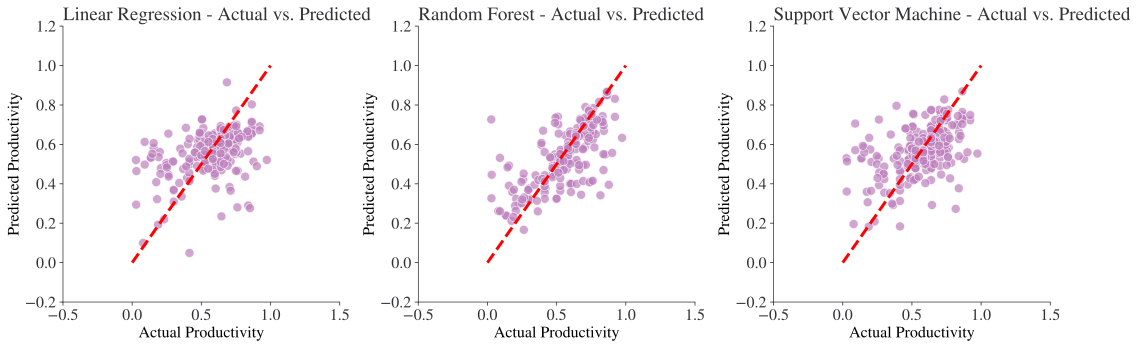

In [108]:
# MODELING
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

print("Transformed Data Sample:")
print(df.head())

# Split the data into features and target
X = df.drop(columns=['actual_productivity'])
y = df['actual_productivity']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Machine": SVR()
}

# Dictionary to store results and predictions
results = {}
predictions = pd.DataFrame({"Actual": y_test})

# Train, predict, and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Store predictions for comparison
    predictions[model_name] = y_pred
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "R^2 Score": r2
    }

# Display evaluation metrics for each model
print("Model Performance Metrics:\n")
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n" + "-"*30 + "\n")

# Show sample predictions for comparison
print("Sample Predictions Comparison:\n")
print(predictions.head(10))  # Display first 10 rows for comparison

# Plot Actual vs Predicted for each model
plt.figure(figsize=(15, 5))
for i, (model_name, _) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=y_test, y=predictions[model_name], alpha=0.7)
    plt.plot([0, 1], [0, 1], 'r--')  # Reference line for perfect predictions
    plt.xlabel("Actual Productivity")
    plt.ylabel("Predicted Productivity")
    plt.title(f"{model_name} - Actual vs. Predicted")

plt.tight_layout()
plt.show()


Model Performance Comparison : 

•	Random Forest outperformed both Linear Regression and SVM in terms of all metrics:

•	MAE: Random Forest has the lowest Mean Absolute Error (0.0791), indicating that, on average, its predictions are closer to the actual values compared to the other models.

•	MSE: Random Forest also has the lowest Mean Squared Error (0.0173), suggesting it makes fewer large errors compared to the other models.

•	R2R^2R2 Score: With an R2R^2R2 score of 0.5063, Random Forest explains about 50.6% of the variance in productivity, which is significantly better than 

